# Titanic Dataset Analysis

By: Jubin Soni (jubins@nyu.edu)

Udacity Data Analyst Nanodegree Project

### Data and Setup

#### Loading Data Analysis and Data Visualization Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display, Image
%matplotlib inline
mpl.rcParams['patch.force_edgecolor'] = True

#### Read in the csv file as a dataframe

In [15]:
titanic_df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv')
titanic_df.to_csv('titanic_dataset.csv')

#### Checking Info() and head() of the dataframe

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic Questions

#### How many people Survived

In [5]:
print("Mean Survival Rate: {}".format(titanic_df['Survived'].mean()))

Mean Survival Rate: 0.3838383838383838


Conclusion: Only 38% people could survive the Titanic.

#### What are Age statistics of people in the ship

Mean Age: 29.69911764705882
Max Age:  80.0
Min Age:  0.42


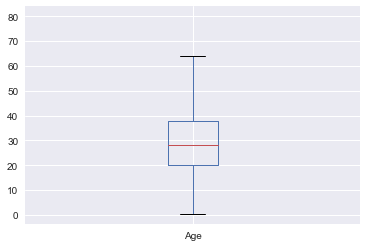

In [6]:
print("Mean Age: {}".format(titanic_df['Age'].mean()))
print("Max Age:  {}".format(titanic_df['Age'].max()))
print("Min Age:  {}".format(titanic_df['Age'].min()))
display(titanic_df['Age'].plot.box())

Conclusion: We see that the average population in Titanic was young. And it is strange that the minimum age is a fractional number while the maximum age seems appropriate.

#### How many people survived based on Pclass attribute (Ticket type: Upper Class  = 1, Middle Class = 2, Lower Class = 3)

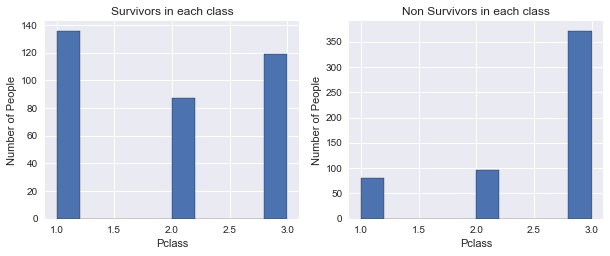

In [7]:
def survival_based_on_class(df, isSurvived, field):
    """
    This function returns a dataframe based on survival criteria given in input format as below.
    df: dataframe
    isSurvived: 1=Yes, 0=No
    field: Column Name
    field_value: Column Value
    For example: field: Pclass has 3 unique values 1,2,3 (Upper,Middle,Lower clas respectively)
    """
    survival_condition = titanic_df['Survived']==isSurvived
    return df[survival_condition][field]

#Plot of people who survived
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(survival_based_on_class(titanic_df, 1, 'Pclass'))
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.title('Survivors in each class')

#Plot of people who did not survive
plt.subplot(2,2,2)
plt.hist(survival_based_on_class(titanic_df, 0, 'Pclass'))
plt.xlabel('Pclass')
plt.ylabel('Number of People')
plt.title('Non Survivors in each class')

Conclusion: We see that more than 350 people died in Lower class, 100 people died in Middle class where as only 80 people died in Upper class. Where as most people survived in Upper class and only 90 and 120 people survived in Middle and Lower class. This means there were lot less survived passangers who had the lower class ticket.

#### How many people survived based on Sex attribute (Sex: male, female)

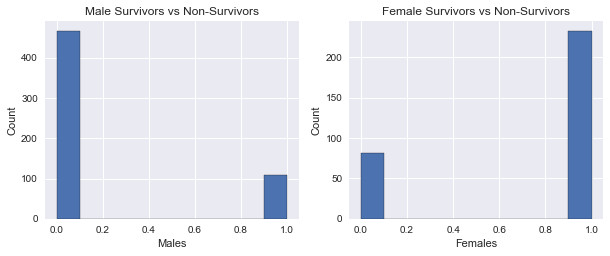

In [8]:
def survival_based_on_sex(df, field, sex):
    """
    This function returns a dataframe based on survival criteria given in input format as below.
    df: dataframe
    field: Column Name
    sex: Male/Female
    """
    return df[df[field]==sex]['Survived']

#Plot of people who survived
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.hist(survival_based_on_sex(titanic_df, 'Sex', 'male'))
plt.xlabel('Males')
plt.ylabel('Count')
plt.title('Male Survivors vs Non-Survivors')

#Plot of people who did not survive
plt.subplot(2,2,2)
plt.hist(survival_based_on_sex(titanic_df, 'Sex', 'female'))
plt.xlabel('Females')
plt.ylabel('Count')
plt.title('Female Survivors vs Non-Survivors')

Conclusion: Over 400 males died and only 70 females did not survive. More than 200 females survived where as only 80 males survived. This shows that lot of females survived as compared to males and very few females died as compared to males.

#### How many people survived based on embarked (Port of Embarktion: C = Cherbourg, Q = Queenstown, S = Southampton)

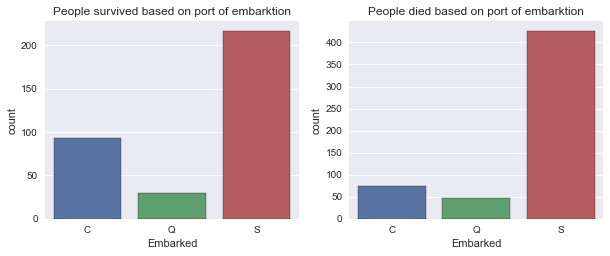

In [9]:
def survival_based_on_embarktion(df, isSurvived):
    """
    This function returns a dataframe based on survival criteria given in input format as below.
    df: dataframe
    isSurvived: 0 is not survived, 1 is survived
    Already considers Embarked: Port of embarktion: C = Cherbourg, Q = Queenstown, S = Southampton
    """
    return df[df['Survived']==isSurvived][['Embarked','Survived']]

#Plot of people who survived
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='Embarked', data=survival_based_on_embarktion(titanic_df, 1),order=['C', 'Q', 'S'])
plt.title('People survived based on port of embarktion')

#Plot of people who survived
plt.subplot(2,2,2)
sns.countplot(x='Embarked', data=survival_based_on_embarktion(titanic_df, 0), order=['C', 'Q', 'S'])
plt.title('People died based on port of embarktion')

Conclusion: We see that lot of people died who embarked from port S, but see also see people survived from port S are maximum. Similarly we see people from port C and Q died and survived in equal number. Overall this feature does not give us a lot of information.

### Exploratory Data Analysis

#### Which Age group survived the most?

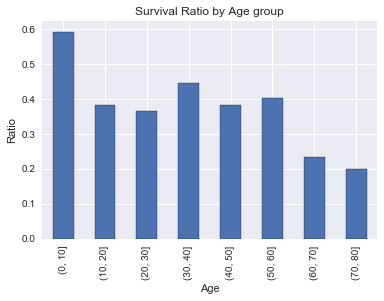

In [10]:
groupby_age = pd.cut(x=titanic_df['Age'], bins=np.arange(0, 90, 10))
titanic_df.groupby(groupby_age).mean()['Survived'].plot.bar()
plt.title('Survival Ratio by Age group')
plt.ylabel('Ratio')

Conclusion: We see that the childrens are the majority of survivors. The adults between age 30 to 40 and so on. Unfortunately, these all ratios are below 0.6 or 60%.

#### What is Fare statistic by Pclass?

In [11]:
def fare_statistics(df, field, field_value):
    """
    This function returns a mean, std, min and max for Fare
    Pass field as Pclass, field_value as values for Pclass
    """
    fare_df = df[df[field]==field_value]['Fare']
    fare_mean = fare_df.mean()
    fare_std = fare_df.std(ddof=0)
    fare_min = fare_df.min()
    fare_max = fare_df.max()
    return fare_mean, fare_max, fare_std, fare_min

def fare_statistics_pclass(df, field):
    """
    This function returns dataframe of statistics for Fare by Pclass
    """
    fare_Pclass = {'Upper Class':fare_statistics(titanic_df, field, 1),
                   'Middle Class':fare_statistics(titanic_df, field, 2),
                   'Lower Class':fare_statistics(titanic_df, field, 3)}
    return pd.DataFrame(fare_Pclass, index=['Mean', 'Max', 'Std', 'Min'])


fare_statistics_pclass(titanic_df,'Pclass')

,Lower Class,Middle Class,Upper Class
Mean,13.675550,20.662183,84.154687
Max,69.550000,73.500000,512.329200
Std,11.766142,13.380889,78.198726
Min,0.000000,0.000000,0.000000


Conclusion: Its strange that:
1. The Maximum fare for lower class and Mean fare for upper class does not have huge difference.
2. Minimum Fare is $0 for all three classes.
3. Standard deviation for each class is very high, almost near the mean.

This tells us that the Fares for upper class, middle class, lower class are not evenly charged to customers. Some customers enjoyed the upper class luxury at lower price and some customers paid huge price for Upper class ticket.

#### Hypothesis Testing: Does the Upper Class had better chances of survival?

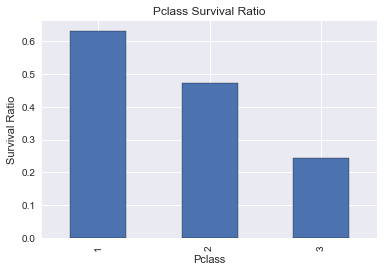

In [12]:
#Plotting graph of survival ratio by class
#From below graph, Can we assume that Upper Class has higher survival ratio than other classes?
display(titanic_df.groupby('Pclass')['Survived'].mean().plot.bar())
plt.title("Pclass Survival Ratio")
plt.ylabel("Survival Ratio")

In [13]:
#H0: There was no difference in survival between upper or lower class
#H1: Upper class had better chance of survival

#Calculating the Z-Score
def calculate_z_score(df, sample_class, class_value, population_class):
    """
    Takes input as dataframe, sample and population and calculates the z-score
    Higher Z-score tells that H1 is correct
    Lower Z-score tells that H0 is correct
    """
    sample = df[(df[sample_class]==class_value)][population_class]
    population = df[population_class]
    n = population.shape[0]
    standard_error = (sample.std()/np.sqrt(n))
    return (sample.mean() - population.mean())/standard_error

print('Z-Score Upper Class:',calculate_z_score(titanic_df, 'Pclass', 1, 'Survived'))
print('Z-Score Middle Class:',calculate_z_score(titanic_df, 'Pclass', 2, 'Survived'))
print('Z-Score Lower Class:',calculate_z_score(titanic_df, 'Pclass', 3, 'Survived'))

Z-Score Upper Class: 15.1578261144
Z-Score Middle Class: 5.30588474781
Z-Score Lower Class: -9.84498423612


Conclusion: Clearly, the Z-Score tells is very low for Lower Class as compared to Z-Score of Upper class. Hence our assumption is true that "Upper class had better chances of survival than other classes".

### Extending our Analysis and Drawing Insights

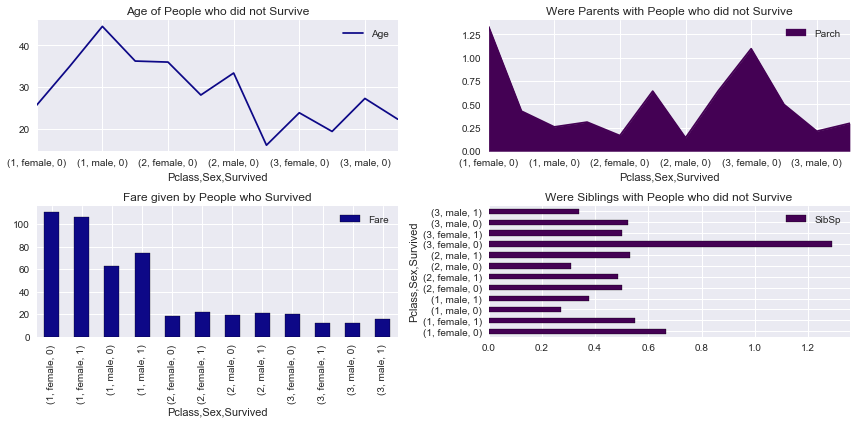

In [14]:
survived_df = titanic_df.groupby(['Pclass','Sex','Survived'])[['Age','SibSp','Parch','Fare']].mean()

plt.figure(figsize=(12,6))

#Survival Age Relation
plt.subplot(2,2,1)
survived_df['Age'].plot(kind='line', legend=True, colormap='plasma')
plt.title('Age of People who did not Survive')

#Survival Fare Relation
plt.subplot(2,2,2)
survived_df['Parch'].plot(kind='area', legend=True, colormap='viridis')
plt.title('Were Parents with People who did not Survive')

#Survival Fare Relation
plt.subplot(2,2,3)
survived_df['Fare'].plot(kind='bar', legend=True, colormap='plasma')
plt.title('Fare given by People who Survived')

#Survival Fare Relation
plt.subplot(2,2,4)
survived_df['SibSp'].plot(kind='barh', legend=True, colormap='viridis')
plt.title('Were Siblings with People who did not Survive')

plt.tight_layout()

Conclusion: From above findings we can conclude that:
1. Majority of people who died in Titanic disaster were males above age of 40.
2. Eventhough more females survived as compared to males, the only ones who could not survive were with their Parents/Children.
3. More fare was given by people who Survived (Upper Class) as compared to the people having Middle Class and Lower Class ticket.
4. The females who were with their Siblings/Spouses could not survive.

#### Thank you for going through my analysis.